# Data Analysis Project

# Australia car market data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
"""Questions
1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?
2) How does the condition of a car (Status) affect its price?
3) Is there a correlation between mileage (Kilometers) and the price of a car?
4) How does engine capacity (CC) relate to car price and mileage?

"""

'Questions\n1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?\n2) How does the condition of a car (Status) affect its price?\n3) Is there a correlation between mileage (Kilometers) and the price of a car?\n4) How does engine capacity (CC) relate to car price and mileage?\n\n'

In [3]:
data=pd.read_csv("cars_info.csv")
data.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [4]:
data.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [6]:
data.columns

Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Gearbox', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity'],
      dtype='object')

In [7]:
print("Total rows in a dataset:",len(data))
data=data.drop_duplicates()
print("After removing duplicates values in a dataset:",len(data))

Total rows in a dataset: 17048
After removing duplicates values in a dataset: 17048


In [8]:
data.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

# 1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?


In [9]:
average_price = data.groupby('Brand')['Price'].mean().reset_index()

# Find highest and lowest average prices
highest_avg_price = average_price.loc[average_price['Price'].idxmax()]
lowest_avg_price = average_price.loc[average_price['Price'].idxmin()]

# idxmax() means to identify the first occurences of max value same to idxmin()

In [10]:
average_price.head()

,Brand,Price
0,Abarth,37493.800000
1,Alfa Romeo,49282.545455
2,Aston Martin,235120.000000
3,Audi,52605.027027
4,BMW,56373.000000


In [11]:
print("Highest average Price of Brand:",highest_avg_price)

Highest average Price of Brand: Brand      Lamborghini
Price    452923.333333
Name: 32, dtype: object


In [12]:
print("Lowest average price of brand:",lowest_avg_price)

Lowest average price of brand: Brand      Saab
Price    8435.0
Name: 50, dtype: object


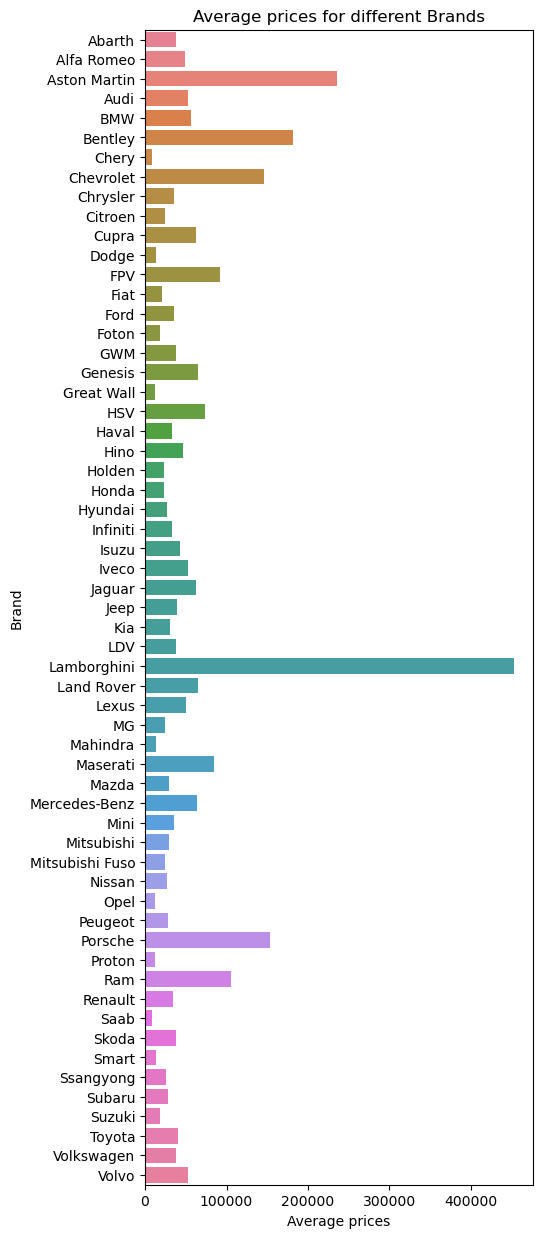

In [13]:
plt.figure(figsize=(5,15))
sns.barplot(data=average_price,x='Price',y='Brand',orient='h',hue='Brand')
plt.title("Average prices for different Brands")
plt.xlabel("Average prices")
plt.ylabel("Brand")
plt.show()

# 2) How does the condition of a car (Status) affect its price?


In [14]:
data.head(1)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5


In [15]:
data['Status'].unique()

array([' Used', ' New In Stock', ' Demo'], dtype=object)

Text(0.5, 1.0, 'Status of cars and its prices')

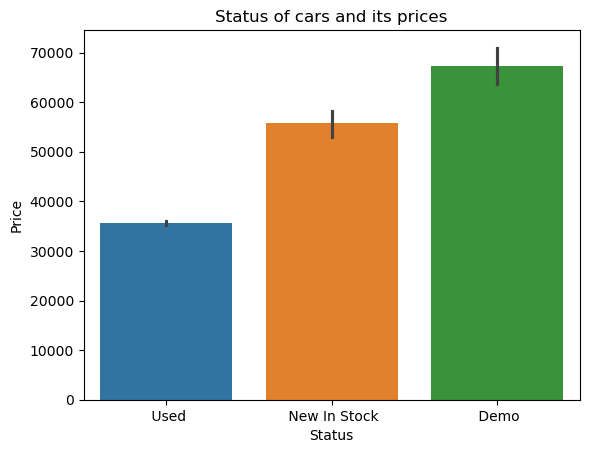

In [28]:
sns.barplot(data=data,x='Status',y='Price',hue='Status')
plt.title("Status of cars and its prices")

Text(0.5, 1.0, 'Status of cars and its prices')

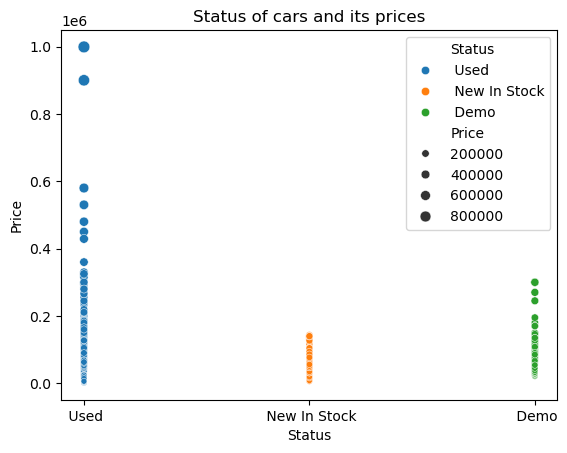

In [27]:
sns.scatterplot(data=data,x='Status',y='Price',size='Price',hue='Status')
plt.title("Status of cars and its prices")

In [32]:
status=data[['Status','Price']]
status.head()

,Status,Price
0,Used,9999
1,New In Stock,117990
2,New In Stock,79990
3,Used,34990
4,Used,15990


In [43]:
used_status = status[status['Status'] == ' Used']
used_status.head()
used_status_avg=used_status['Price'].mean()

In [41]:
new_stock=status[status['Status'] == ' New In Stock']
new_stock.head()
new_stock_avg=new_stock['Price'].mean()

In [44]:
demo_status=status[status['Status'] == ' Demo']
demo_status.head()
demo_status_avg=demo_status['Price'].mean()

In [45]:
print("The average prices of used cars:",used_status_avg)
print("The average prices of New In Stock cars:",new_stock_avg)
print("The average prices of Demo cars:",demo_status_avg)



The average prices of used cars: 35638.70724975466
The average prices of New In Stock cars: 55703.207282913165
The average prices of Demo cars: 67307.57622739018


### The demo cars have high prices compare to used and New in stock cars

### So, based on Status of cars the price will different

# 3) Is there a correlation between mileage (Kilometers) and the price of a car?


Text(0.5, 1.0, 'Car Mileage and its Price')

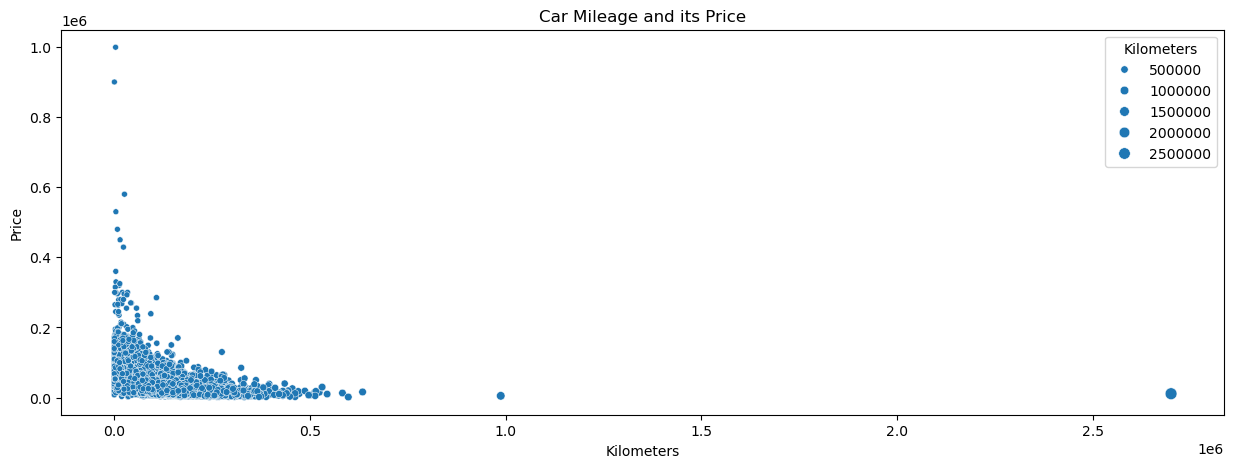

In [54]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='Kilometers',y='Price',size='Kilometers')
plt.title("Car Mileage and its Price")

In [48]:
cor=data[['Kilometers','Price']].corr()
print("Corelation of Mileage and Price:",cor)

Corelation of Mileage and Price:             Kilometers    Price
Kilometers     1.00000 -0.44749
Price         -0.44749  1.00000


<Axes: >

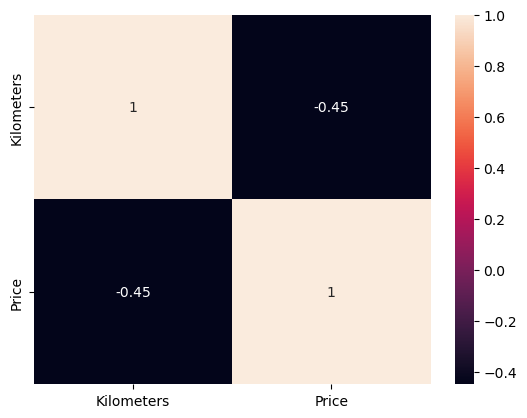

In [49]:
sns.heatmap(cor,annot=True)

### Cars with higher mileage (more kilometers driven) generally have lower price.
### As mileage incerases then car price is decreases

# 4) How does engine capacity (CC) relate to car price and mileage?


In [55]:
data.head(1)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5


In [56]:
engine=data[['CC','Kilometers','Price']]
engine.head()

,CC,Kilometers,Price
0,2362,263000,9999
1,2143,19,117990
2,2143,24,79990
3,2143,120579,34990
4,1796,72506,15990


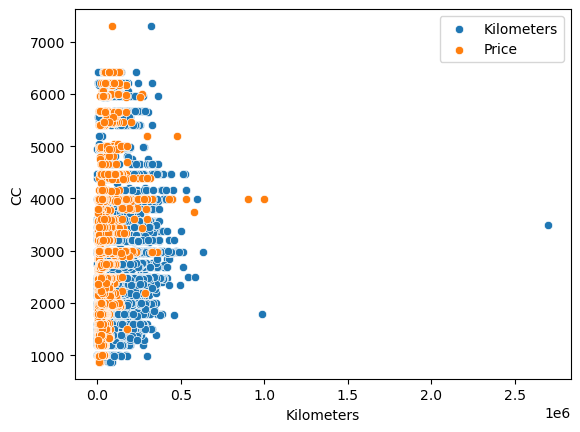

In [58]:
sns.scatterplot(data=engine,x='Kilometers',y='CC',label='Kilometers')
sns.scatterplot(data=engine,x='Price',y='CC',label='Price')
plt.legend()

In [59]:
en_corr=engine.corr()
print("Correlation of price,CC, and Mileage:",en_corr)

Correlation of price,CC, and Mileage:                   CC  Kilometers     Price
CC          1.000000    0.185219  0.298205
Kilometers  0.185219    1.000000 -0.447490
Price       0.298205   -0.447490  1.000000


<Axes: >

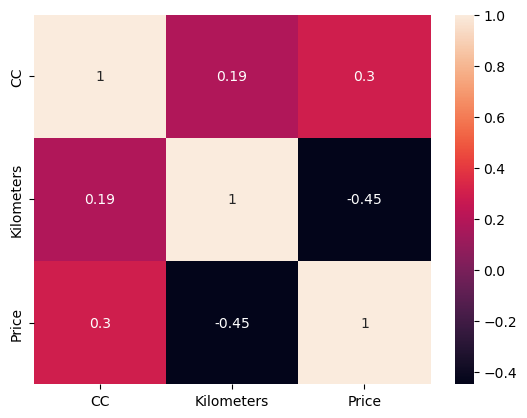

In [60]:
sns.heatmap(en_corr,annot=True)

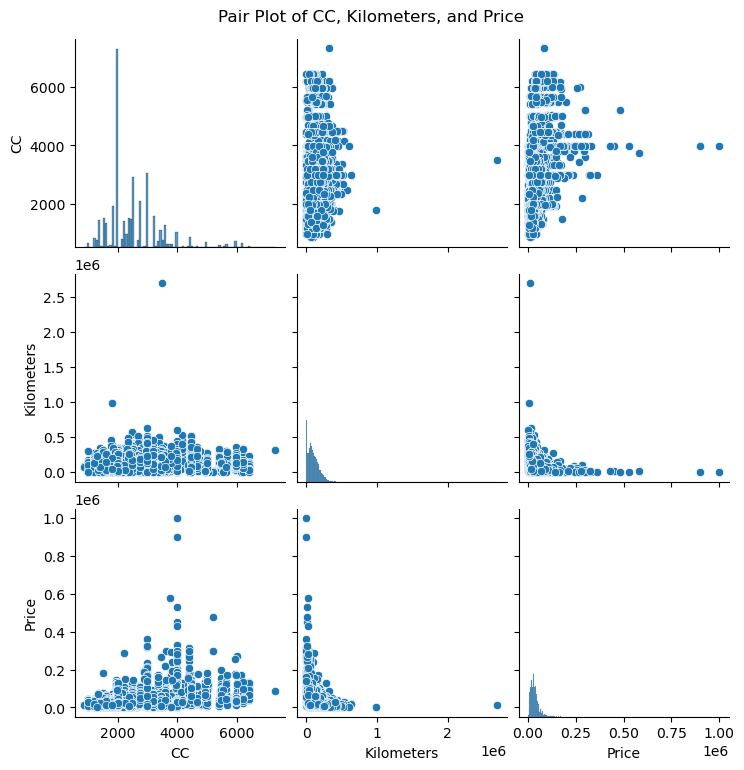

In [63]:
sns.pairplot(data=engine)
plt.suptitle('Pair Plot of CC, Kilometers, and Price', y=1.02)
plt.show()

### Cars with higher engine capacities are typically priced higher
### cars with higher mileage tend to have lower prices